# Predicting number of passengers survived in Titanic using Machine Learning

This note book consists of variuos Python-based Machine Learning tools and data science libraries to predict whether a pessenger is survived or not based on his travel record.

## 1. Problem definition
Given travel parameters of a passenger, can we predict whether a passenger is survived or not?

## 2. Data
This data is collected from Kaggle Titanic challenge.
https://www.kaggle.com/c/titanic/data


## 3. Evaluation
Correctly predict whether a passenger is survived or not.

## 4. Features
Kaggle provides the data dictionary detailing with features of dataset.
https://www.kaggle.com/c/titanic/data

* survival : Survival(0 = No & 1 = Yes)
* pclass 	 : Ticket class(1 = 1st, 2 = 2nd & 3 = 3rd)
* sex 	 : Sex 	
* Age 	 : Age in years 	
* sibsp 	 : number of siblings / spouses aboard the Titanic 	
* parch 	 : number of parents / children aboard the Titanic 	
* ticket 	 : Ticket number 	
* fare 	 : Passenger fare 	
* cabin 	 : Cabin number 	
* embarked : Port of Embarkation(C = Cherbourg, Q = Queenstown & S = Southampton)



##  Preparing the tools
I am using Pandas, Numpy, Mathplotlib and Scikit learn libraries for data analysis and manipulation 

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


import string
import warnings
warnings.filterwarnings('ignore')

SEED = 42



## Load data

In [2]:
# Reading train and test data
data_train = pd.read_csv("titanic/train.csv")
data_test = pd.read_csv("Titanic/test.csv")
data_all = pd.concat([data_train, data_test], sort=True).reset_index(drop=True)

print("Training data shape:{}".format(data_train.shape))
print("Test data shape:{}".format(data_test.shape))
print("All data shape:{}".format(data_all.shape))
data_all.head()

Training data shape:(891, 12)
Test data shape:(418, 11)
All data shape:(1309, 12)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [3]:
# Checking train data information
print(data_train.info())
data_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [4]:
# Checking test data info
print(data_test.info())
data_test.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,1155,3,"Klasen, Miss. Gertrud Emilia",female,1.0,1,1,350405,12.1833,NaN,S
192,1084,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,NaN,S
278,1170,2,"Ware, Mr. John James",male,30.0,1,0,CA 31352,21.0000,NaN,S


In [5]:
# Let's find how many of each class
print("Number of people not survived:{}".format(data_train.Survived.value_counts()[0]))
print("Number of people survived:{}".format(data_train.Survived.value_counts()[1]))

Number of people not survived:549
Number of people survived:342


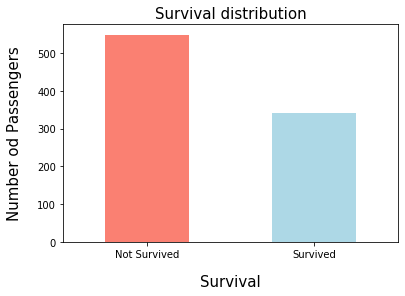

In [6]:
# Plot the count values
data_train.Survived.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Survival distribution", size=15)
plt.xlabel("Survival", size=15, labelpad=15)
plt.ylabel("Number od Passengers", size=15, labelpad=15)
plt.xticks((0, 1), ['Not Survived', 'Survived'], rotation=0);



In [56]:
# Survived mean rate per Pclass
data_train.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [57]:
# Cross tab for Pclass and Survived 
cross_Pclass = pd.crosstab(data_train.Pclass, data_train.Survived)
cross_Pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


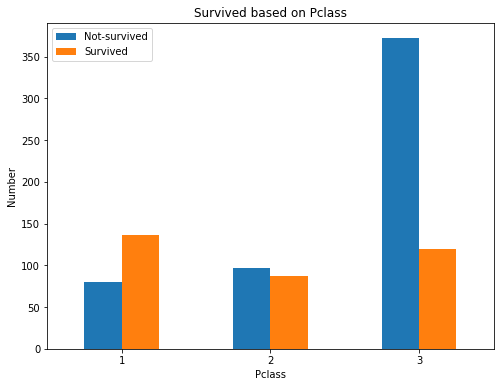

In [58]:
# Plot for Pclass and survived 
cross_Pclass.plot(kind="bar",
                  figsize=(8, 6))
plt.title("Survived based on Pclass")
plt.xlabel("Pclass")
plt.ylabel("Number")
plt.legend(["Not-survived", "Survived"])
plt.xticks(rotation=0);

In [59]:
# Cross tab for sex and survived
cross_gender = pd.crosstab(data_train.Sex, data_train.Survived)
cross_gender

Survived,0,1
Sex,,
female,81,233
male,468,109


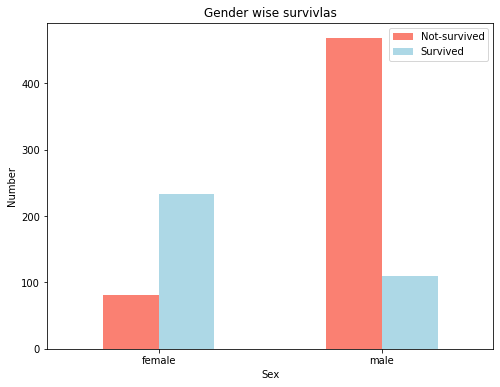

In [60]:
# Plot for sex and survived
cross_gender.plot(kind="bar",
                  figsize=(8, 6),
                  color=(["salmon", "lightblue"]))
plt.title("Gender wise survivlas")
plt.ylabel("Number")
plt.legend(["Not-survived", "Survived"])
plt.xticks(rotation=0);



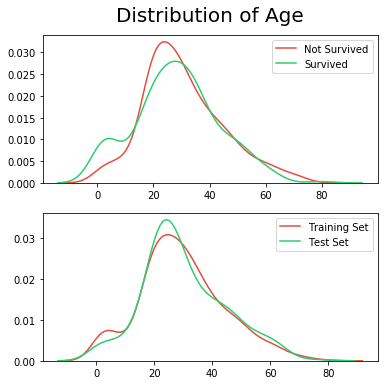

In [183]:
surv = data_train.Survived == 1
feature = "Age"

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(6, 6))
sns.distplot(data_train[~surv][feature], label='Not Survived', hist=False, color='#e74c3c', ax=ax1)
sns.distplot(data_train[surv][feature], label='Survived', hist=False, color='#2ecc71', ax=ax1)
# Distribution of feature in dataset
sns.distplot(data_train[feature], label='Training Set', hist=False, color='#e74c3c', ax=ax2)
sns.distplot(data_test[feature], label='Test Set', hist=False, color='#2ecc71', ax=ax2)
    
ax1.set_xlabel('')
ax2.set_xlabel('')

ax1.set_title('Distribution of {}'.format('Age'), size=20, y=1.05);
#ax2.set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)

## Correlation Matrix

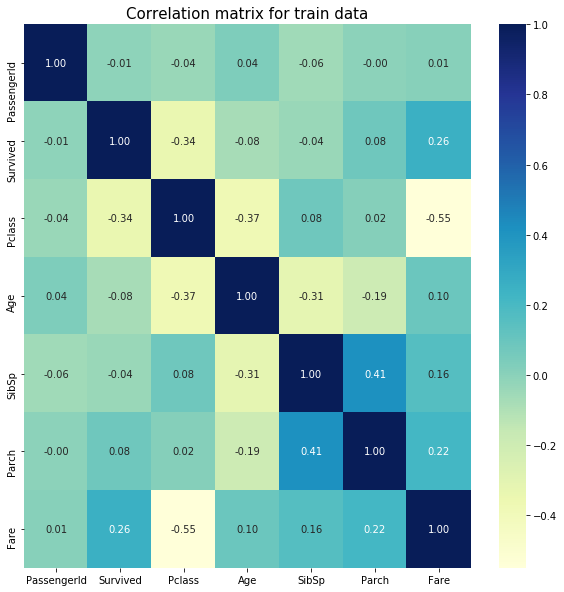

In [117]:
# Correlation matrix for training data set
train_correlation = data_train.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(train_correlation, 
                 annot=True, 
                 fmt=".2f", 
                 cmap="YlGnBu")
ax.set_title("Correlation matrix for train data", size=15);


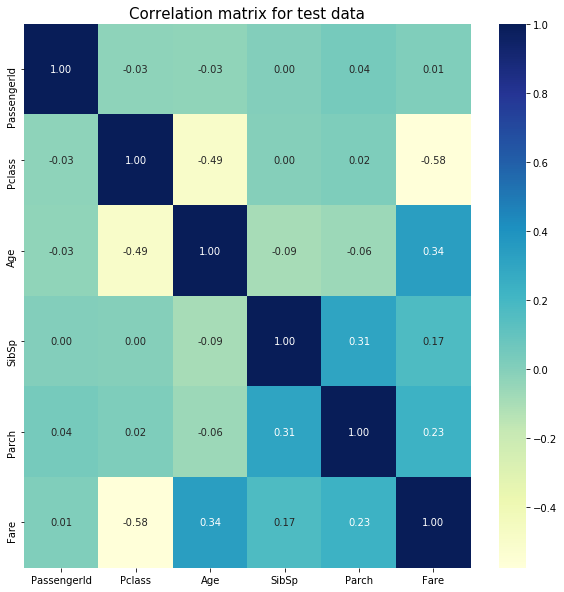

In [115]:
# Correlation matrix for test data set
test_corr = data_test.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(test_corr,
                 annot=True,
                 fmt=".2f",
                  cmap="YlGnBu")
ax.set_title("Correlation matrix for test data", size=15);

## Filling missing values

In [45]:
# To see missing values in train dataset
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
# To see missing values in test dataset
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [134]:
# Missing values of all data set
data_all.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [49]:
# Correlation coefficient matrix for 
data_all.corr().abs()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,0.150917,0.028814,0.408106,0.243699,0.077221
Fare,0.178740,1.000000,0.221539,0.031428,0.558629,0.160238,0.257307
Parch,0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,0.038354,0.055224,0.005007
Pclass,0.408106,0.558629,0.018322,0.038354,1.000000,0.060832,0.338481
SibSp,0.243699,0.160238,0.373587,0.055224,0.060832,1.000000,0.035322
Survived,0.077221,0.257307,0.081629,0.005007,0.338481,0.035322,1.000000


Missing values of age can be filled by it's median but this would not be the good option. Instead, median age of Pclass group is considere because Pclass is highly correlated with age. To be more accurate we can group by Sex as well.

In [3]:
# Age of Pclass and Sex groups
Age_pclass_sex = data_all.groupby(['Sex', 'Pclass']).median()['Age']
Age_pclass_sex

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [4]:
# Filling the missing values in Age with median of Sex and Pclass groups
data_all['Age'] = data_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Embarked is a categorical valriable and it's missing values can be filled by it's mode.

In [5]:
# Missing vales of Embarked filled with it's mode
Em_mode = data_all.Embarked.mode()[0]

data_all["Embarked"] = data_all["Embarked"].fillna(Em_mode)


In [6]:
# Missing value of Fare is filled by it's median
data_all["Fare"] = data_all["Fare"].fillna(data_all["Fare"].median())

In [7]:
# Checking which categorical columns has null values
for label, content in data_all.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

Cabin


In [8]:
# Filling Categorical missing values and converting it into numbers 
for label, content in data_all.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            #data[label+"_missing"] = pd.isnull(content)
            data_all[label] = pd.Categorical(content).codes + 1

In [9]:
data_all.isna().sum()

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [53]:
data_all.dtypes

Age                 category
Cabin                  int16
Embarked              object
Fare                category
Name                  object
Parch                  int64
PassengerId            int64
Pclass                 int64
Sex                   object
SibSp                  int64
Survived             float64
Ticket                object
Family_size            int64
Ticket_frequency       int64
dtype: object

## Feature Engineering

### Fare


In [10]:
# Fare feature is divided into 13 based bins
data_all['Fare'] = pd.qcut(data_all['Fare'], 10)

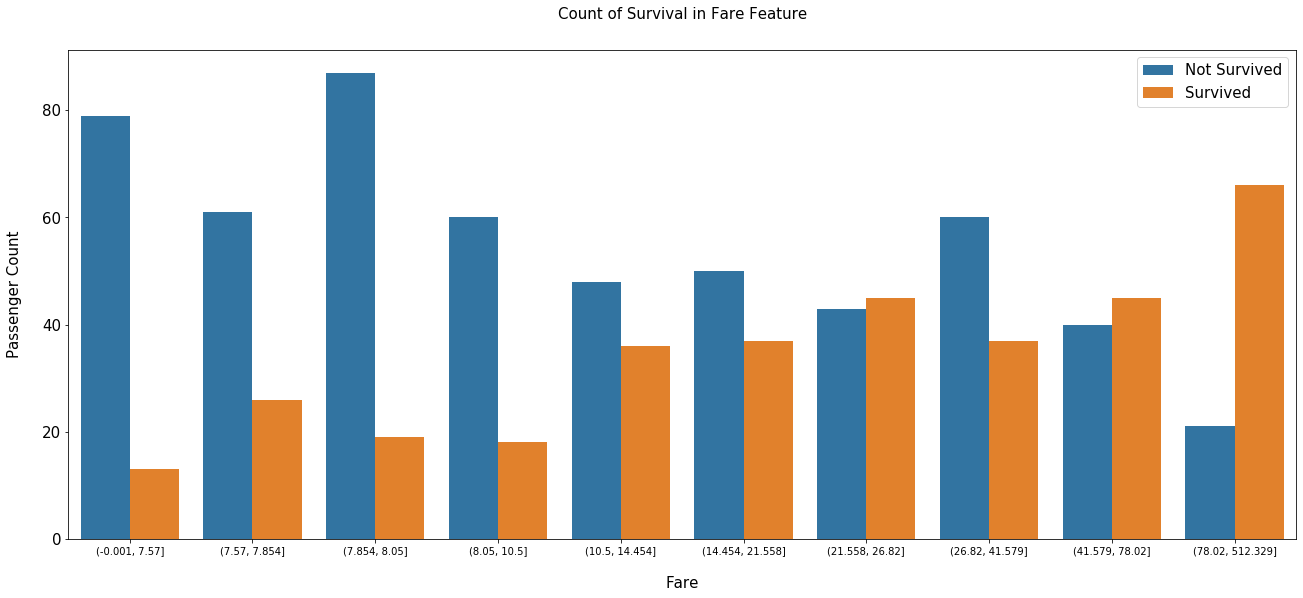

In [11]:
# Fare plot
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=data_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

### Age

In [12]:
# Age is divided into 10 based bins
data_all['Age'] = pd.qcut(data_all['Age'], 10)

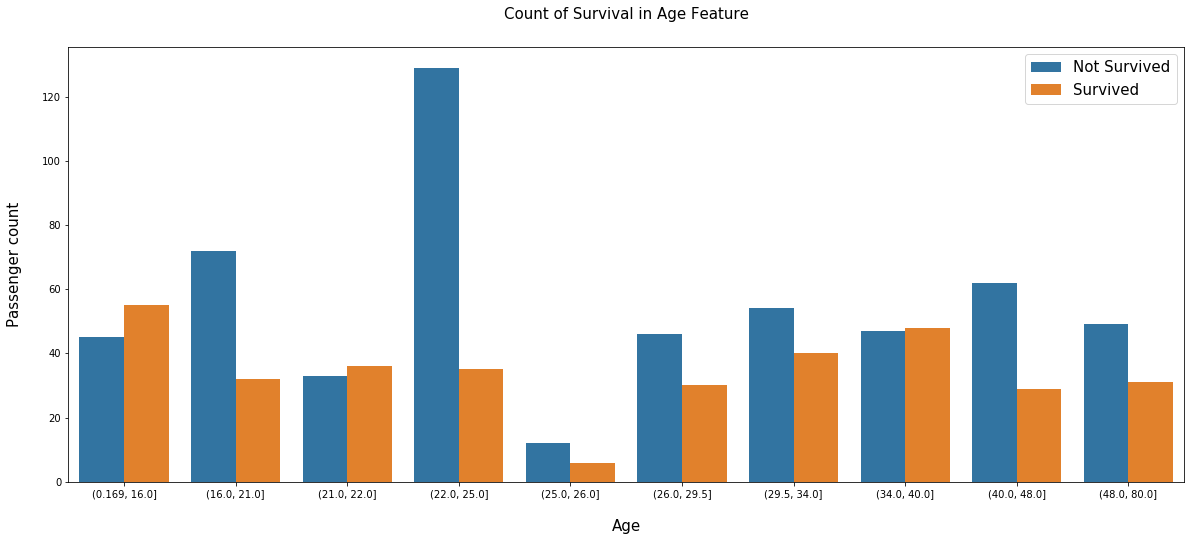

In [13]:
# Age plot
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='Age', hue='Survived', data=data_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger count', size=15, labelpad=20)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Age'), size=15, y=1.05);

### Family size

In [22]:
# Family size is created by adding SibSp and Parch
data_all['Family_size'] = data_all['SibSp'] + data_all['Parch'] +1

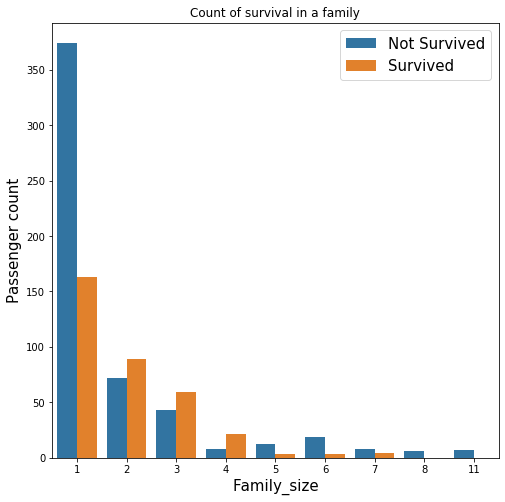

In [23]:
# Family size plot
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='Family_size', hue='Survived', data=data_all)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.xlabel('Family_size', size=15)
plt.ylabel('Passenger count', size=15)
plt.title('Count of survival in a family');

### Ticket frequency

Many passengers travelled with a group of friends, nannies or maids, this is not considered as a family but they used same tickets.

In [24]:
# Creating Ticket frequency column by grouping Ticket
data_all['Ticket_frequency'] = data_all.groupby('Ticket')['Ticket'].transform('count')

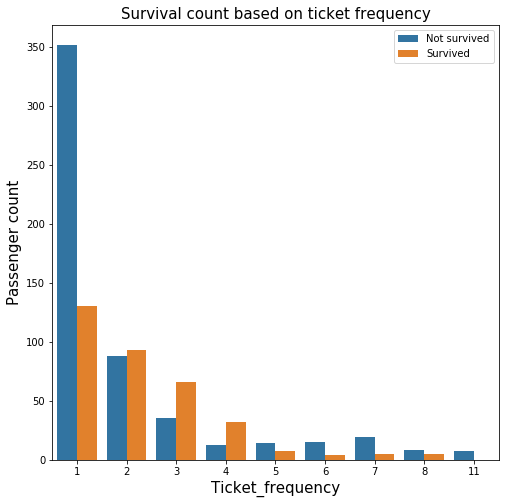

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(x='Ticket_frequency', hue='Survived', data=data_all)

plt.xlabel('Ticket_frequency', size=15)
plt.ylabel('Passenger count', size=15)
plt.title('Survival count based on ticket frequency', size=15)
plt.legend(['Not survived', 'Survived'], loc='upper right');

### Title

Title column is created by extracting the prefix before Name feature.

In [26]:
data_all["Title"] = data_all['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]
data_all['Is_Married'] =0
data_all['Is_Married'].loc[data_all['Title'] == 'Mrs'] = 1

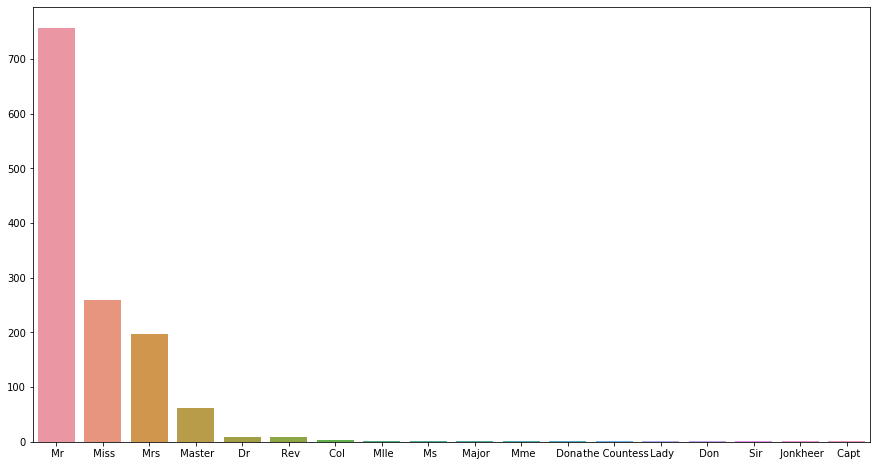

In [63]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=data_all["Title"].value_counts().index, y=data_all['Title'].value_counts().values)

In [31]:
# Split data
df_train = data_all.loc[:890]
df_test = data_all.loc[891:]
dfs = [df_train, df_test]

In [32]:
data_train.shape, data_test.shape, df_train.shape, df_test.shape

((891, 12), (418, 11), (891, 16), (418, 16))

In [33]:
df_train.dtypes

Age                 category
Cabin                  int16
Embarked              object
Fare                category
Name                  object
Parch                  int64
PassengerId            int64
Pclass                 int64
Sex                   object
SibSp                  int64
Survived             float64
Ticket                object
Title                 object
Is_Married             int64
Family_size            int64
Ticket_frequency       int64
dtype: object

In [34]:
data_all.dtypes

Age                 category
Cabin                  int16
Embarked              object
Fare                category
Name                  object
Parch                  int64
PassengerId            int64
Pclass                 int64
Sex                   object
SibSp                  int64
Survived             float64
Ticket                object
Title                 object
Is_Married             int64
Family_size            int64
Ticket_frequency       int64
dtype: object

## Feature transformation


### Label Encoding Non-Numeric Features
`Embarked`, `Name`, `Sex` and `Title` are object type, and Age and Fare features are category type. They are converted to numerical type with LabelEncoder. LabelEncoder basically labels the classes from 0 to n. This process is necessary for models to learn from those features.

In [35]:
non_numeric_features = ['Embarked', 'Name', 'Sex', 'Title','Ticket', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])



In [36]:
df_train.dtypes

Age                   int32
Cabin                 int16
Embarked              int32
Fare                  int32
Name                  int32
Parch                 int64
PassengerId           int64
Pclass                int64
Sex                   int32
SibSp                 int64
Survived            float64
Ticket                int32
Title                 int32
Is_Married            int64
Family_size           int64
Ticket_frequency      int64
dtype: object

In [37]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_all = concat_df(df_train, df_test)


df_all.head()

,Age,Cabin,Embarked,Family_size,Fare,Is_Married,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Ticket_frequency,Title
0,2,0,2,2,0,0,108,0,1,3,1,1,0.0,523,1,11
1,7,107,0,2,8,0,190,0,2,1,0,1,1.0,596,2,12
2,4,0,2,1,2,0,353,0,3,3,0,0,1.0,669,1,8
3,7,71,2,2,8,0,272,0,4,1,0,1,1.0,49,2,12
4,7,0,2,1,2,0,15,0,5,3,1,0,0.0,472,1,11


In [38]:
df_all.shape, df_train.shape, df_test.shape

((1309, 16), (891, 16), (418, 16))

## Modelling

In [115]:
drop_cols = ['Survived', 'PassengerId', 'Cabin']
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))
df1_all = df_all.drop(columns=drop_cols)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))


X_train shape: (891, 13)
y_train shape: (891,)
X_test shape: (418, 13)


In [117]:
# Put models in a dictionary
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier 
from sklearn.gaussian_process import GaussianProcessClassifier
import xgboost as xgb


models = {"Logistic Regression" : LogisticRegression(),
           "KNN" : KNeighborsClassifier(),
           "Random Forest" : RandomForestClassifier(),
            "Gradient BoostingClassifier" : GradientBoostingClassifier(),
            "XGBClassifier" : xgb.XGBClassifier(),
            "ExtraTreesClassifier" : ExtraTreesClassifier(),
            "BaggingClassifier" : BaggingClassifier(),
            "AdaBoostClassifier" : AdaBoostClassifier(),
            "GaussianProcessClassifier" : GaussianProcessClassifier()}





# Create a function to fit and score models
def fit_and_score(models, X_train,  y_train):
    """
    Fit and evaluates given Machine Learning models.
    models : a dict of different Scikit-Learn Mahine Learning models
    x_train : training data (no labels)
    x_test : testing data(no labels)
    y_train : training labels
    
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_accuracy = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_accuracy[name] =np.mean(cross_val_score(model, X_train, y_train,
                                                      cv=5, scoring="accuracy"))
        
    return model_accuracy    
    

In [118]:
model_accuracy = fit_and_score(models=models,
                             X_train=X_train,
                             y_train=y_train)

model_accuracy



{'Logistic Regression': 0.7923670830456343,
 'KNN': 0.808097420124286,
 'Random Forest': 0.8260247316552635,
 'Gradient BoostingClassifier': 0.8260435628648548,
 'XGBClassifier': 0.7990709936601594,
 'ExtraTreesClassifier': 0.8092021844203126,
 'BaggingClassifier': 0.813709120582512,
 'AdaBoostClassifier': 0.8159437574540205,
 'GaussianProcessClassifier': 0.8215554579122465}

### Hyperparameters tuning using RandomizedSearchCV

In [119]:
# Instead of finding by hand, RandomizedSearchCV search the best combination of hyper paranmters.
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 500, 1000, 1100, 1500, 1700, 2000],
         "criterion" : ["gini", "entropy"],
        "max_depth" : [None, 5, 7, 10, 15, 30, 40],
        "max_features" : ["auto", "sqrt", "log2"],
         "min_samples_split" : [2, 4, 6, 8, 10],
         "min_samples_leaf" : [1, 2, 4, 6, 8],
          "max_leaf_nodes" : [1, 2, 3],
          "verbose" : [0, 1, 2, 3]}


np.random.seed(42)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)   # n_jobs = how much your computer processor dedicate for this model

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter = 10, # no of models to try
                           cv=5,
                           verbose=True)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 893 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 993 tasks      | elapse

[Parallel(n_jobs=8)]: Done 1700 out of 1700 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1700 out of 1700 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1700 out of 1700 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using ba

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100building tree 12 of 100

building tree 13 of 100
building tree 14 of 100building tree 15 of 100building tree 16 of 100


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100building tree 20 of 100
building tree 21 of 100building tree 22 of 100


building tree 23 of 100building tree 24 of 100
building tree 25 of 100

building tree 26 of 100
building tree 27 of 100building tree 28 of 100building tree 29 of 100


building tree 30 of 100
building tree 31 of 100building tree 32 of 100building tree 33 of 100
building tree 34 of 100

building tree 35 of 100

building tree 36 of 100building tree 37 of 100

building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100building tree 42 of 100bui

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [121]:
# New grid
rs_clf.best_params_

{'verbose': 2,
 'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 3,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'entropy'}

In [122]:
rs_clf2 = RandomForestClassifier(max_depth=None, max_features="sqrt",
                                min_samples_leaf=6, min_samples_split=2,
                                 max_leaf_nodes=3, criterion='entropy',
                                  n_jobs=-1,
                                n_estimators=100, verbose=2)

rs_clf2.fit(X_train, y_train)

building tree 1 of 100building tree 2 of 100building tree 3 of 100

building tree 4 of 100

building tree 5 of 100
building tree 6 of 100building tree 7 of 100

building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100building tree 12 of 100

building tree 13 of 100building tree 14 of 100building tree 15 of 100
building tree 16 of 100
building tree 17 of 100


building tree 18 of 100
building tree 19 of 100building tree 20 of 100

building tree 21 of 100building tree 22 of 100

building tree 23 of 100building tree 24 of 100
building tree 25 of 100

building tree 26 of 100building tree 27 of 100
building tree 28 of 100

building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100building tree 37 of 100

building tree 38 of 100building tree 39 of 100

building tree 40 of 100
building tree 41 of 100
building tree 42 of 100bu

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=3, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

In [123]:
np.mean(cross_val_score(rs_clf2, X_train, y_train, cv=5, scoring="accuracy"))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]:

0.7823049400539828

In [111]:
model_1 = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

model_2 = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1) 

In [116]:
N = 5
oob = 0
probs = pd.DataFrame(np.zeros((len(X_test), N * 2)), columns=['Fold_{}_Prob_{}'.format(i, j) for i in range(1, N + 1) for j in range(2)])
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=df1_all.columns)
fprs, tprs, scores = [], [], []

skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print('Fold {}\n'.format(fold))
    
    # Fitting the model
    model_2.fit(X_train[trn_idx], y_train[trn_idx])
    
    # Computing Train AUC score
    trn_fpr, trn_tpr, trn_thresholds = roc_curve(y_train[trn_idx], model_2.predict_proba(X_train[trn_idx])[:, 1])
    trn_auc_score = auc(trn_fpr, trn_tpr)
    # Computing Validation AUC score
    val_fpr, val_tpr, val_thresholds = roc_curve(y_train[val_idx], model_2.predict_proba(X_train[val_idx])[:, 1])
    val_auc_score = auc(val_fpr, val_tpr)  
      
    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    
    # X_test probabilities
    probs.loc[:, 'Fold_{}_Prob_0'.format(fold)] = model_2.predict_proba(X_test)[:, 0]
    probs.loc[:, 'Fold_{}_Prob_1'.format(fold)] = model_2.predict_proba(X_test)[:, 1]
    importances.iloc[:, fold - 1] = model_2.feature_importances_
        
    oob += model_2.oob_score_ / N
    print('Fold {} OOB Score: {}\n'.format(fold, model_2.oob_score_))   
    
print('Average OOB Score: {}'.format(oob))

Fold 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent worker

Fold 1 OOB Score: 0.8356741573033708

Fold 2



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent worker

Fold 2 OOB Score: 0.82328190743338

Fold 3



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent worker

Fold 3 OOB Score: 0.8330995792426368

Fold 4



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent worker

Fold 4 OOB Score: 0.820476858345021

Fold 5



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent worker

Fold 5 OOB Score: 0.8288920056100981

Average OOB Score: 0.8282849015869014


### Feature Importance

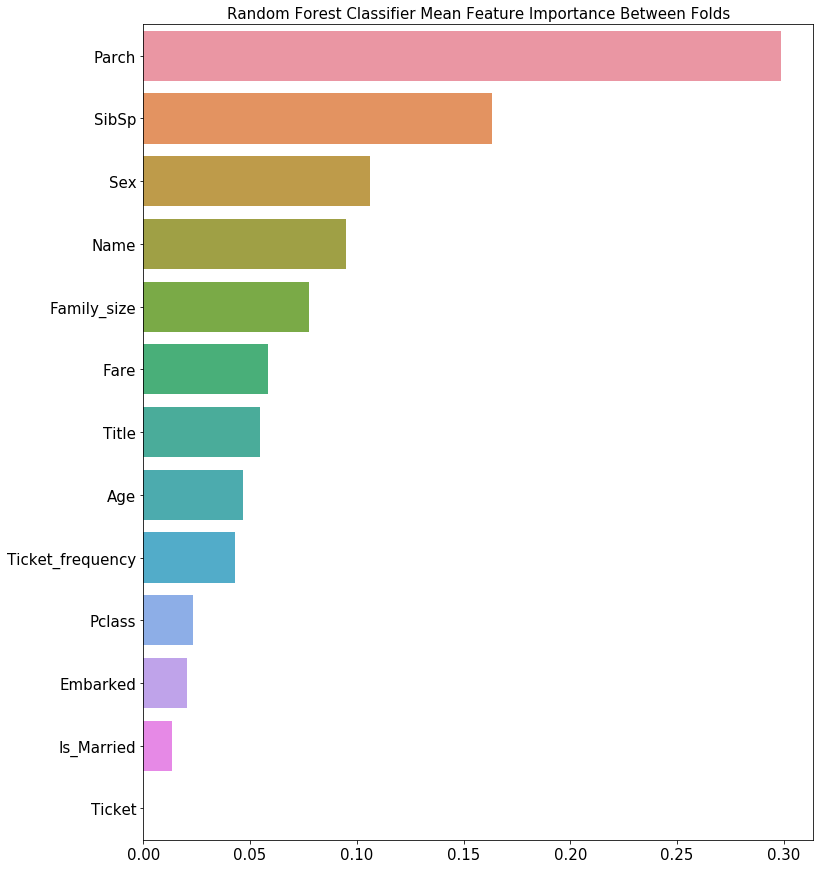

In [128]:
importances['Mean_Importance'] = importances.mean(axis=1)
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(12, 15))
sns.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Random Forest Classifier Mean Feature Importance Between Folds', size=15)

plt.show()

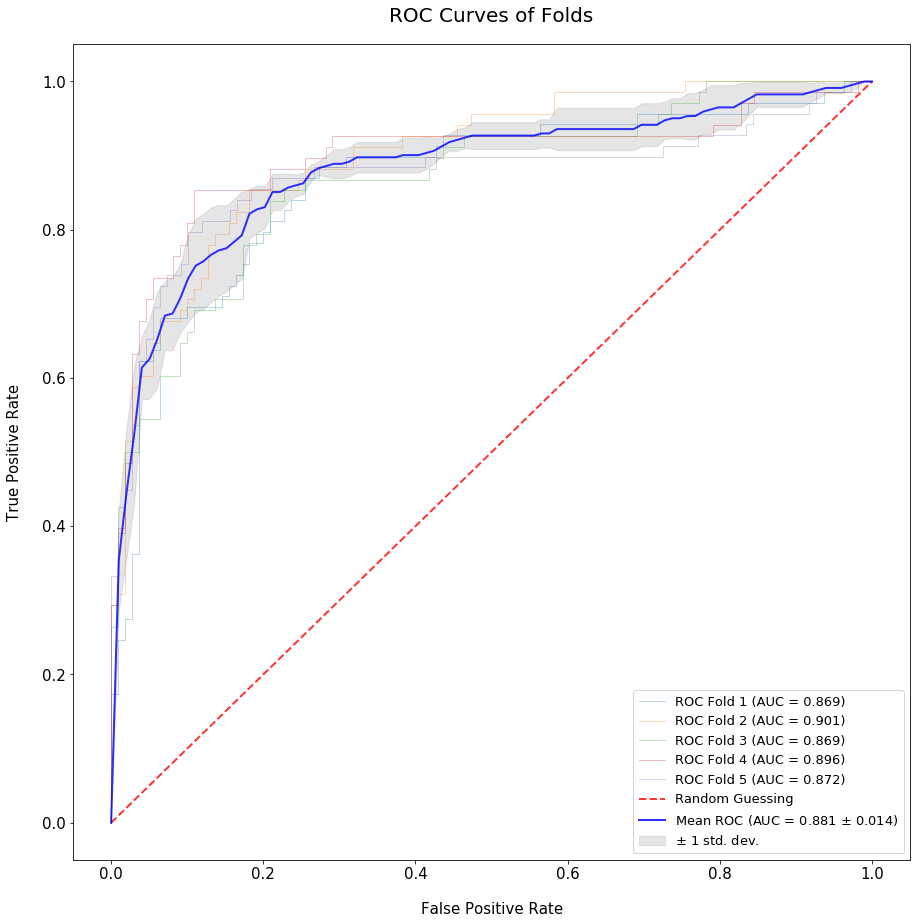

In [124]:
def plot_roc_curve(fprs, tprs):
    
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(15, 15))
    
    # Plotting ROC for each fold and computing AUC scores
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs), 1):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold {} (AUC = {:.3f})'.format(i, roc_auc))
        
    # Plotting ROC for random guessing
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Random Guessing')
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # Plotting the mean ROC
    ax.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc), lw=2, alpha=0.8)
    
    # Plotting the standard deviation around the mean ROC Curve
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='$\pm$ 1 std. dev.')
    
    ax.set_xlabel('False Positive Rate', size=15, labelpad=20)
    ax.set_ylabel('True Positive Rate', size=15, labelpad=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    ax.set_title('ROC Curves of Folds', size=20, y=1.02)
    ax.legend(loc='lower right', prop={'size': 13})
    
    plt.show()

plot_roc_curve(fprs, tprs)

In [126]:
class_survived = [col for col in probs.columns if col.endswith('Prob_1')]
probs['1'] = probs[class_survived].sum(axis=1) / N
probs['0'] = probs.drop(columns=class_survived).sum(axis=1) / N
probs['pred'] = 0
pos = probs[probs['1'] >= 0.5].index
probs.loc[pos, 'pred'] = 1

y_pred = probs['pred'].astype(int)

submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = df_test['PassengerId']
submission_df['Survived'] = y_pred.values
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0
